# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

___

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

___

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


___

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat), sendo uma acima e outra abaixo de -10.5 e aplique o groupby, usando essas faixas como chave e realize operações de soma, média, mínimo, máximo, mediana, desvio padrão e variância para pelo menos 2 variáveis numéricas ainda não utilizadas.


In [3]:
fx_altitude = pd.cut(sinasc['munResLat'], [sinasc['munResLat'].min(), -10.5, sinasc['munResLat'].max()])
fx_altitude.value_counts()

(-10.5, -8.769]    14034
(-13.5, -10.5]     12913
Name: munResLat, dtype: int64

In [4]:
sinasc.groupby(fx_altitude)[['APGAR1', 'APGAR5']].agg([('soma', 'sum'), ('média','mean'),('minimo', 'min'), 
                                                     ('maximo', 'max'),('mediana', 'median'), ('desvio padrão','std'), 
                                                     ('variancia', 'var')])

APGAR1                                                \
                     soma     média minimo maximo mediana desvio padrão   
munResLat                                                                 
(-13.5, -10.5]   103931.0  8.069177    0.0   10.0     8.0      0.961619   
(-10.5, -8.769]  114559.0  8.199771    0.0   10.0     8.0      1.002839   

                             APGAR5                                  \
                variancia      soma     média minimo maximo mediana   
munResLat                                                             
(-13.5, -10.5]   0.924712  117663.0  9.138874    0.0   10.0     9.0   
(-10.5, -8.769]  1.005686  128746.0  9.216551    0.0   10.0     9.0   

                                         
                desvio padrão variancia  
munResLat                                
(-13.5, -10.5]       0.806977  0.651211  
(-10.5, -8.769]      0.774741  0.600224

### 2. Crie 2 faixas da área dos municípios (munResArea), sendo uma acima e outra abaixo de 3000 e aplique o groupby,usando essas faixas como chave e realize operações de soma, média, mínimo, máximo, mediana, desvio padrão e variância para pelo menos 2 variáveis numéricas ainda não utilizadas.


In [5]:
fx_area = pd.cut(sinasc['munResArea'], [sinasc['munResArea'].min(), 3000, sinasc['munResArea'].max()])
fx_area.value_counts()

(3000.0, 34096.394]    21808
(459.978, 3000.0]       5155
Name: munResArea, dtype: int64

In [6]:
sinasc.groupby(fx_area)[['QTDFILVIVO', 'QTDFILMORT']].agg([('soma', 'sum'), ('média','mean'),('minimo', 'min'), 
                                                     ('maximo', 'max'),('mediana', 'median'), ('desvio padrão','std'), 
                                                     ('variancia', 'var')])

QTDFILVIVO                                                \
                          soma     média minimo maximo mediana desvio padrão   
munResArea                                                                     
(459.978, 3000.0]       4718.0  0.925098    0.0   30.0     1.0      1.076172   
(3000.0, 34096.394]    22053.0  1.086890    0.0   14.0     1.0      1.191750   

                              QTDFILMORT                                  \
                    variancia       soma     média minimo maximo mediana   
munResArea                                                                 
(459.978, 3000.0]    1.158146     1247.0  0.245328    0.0    4.0     0.0   
(3000.0, 34096.394]  1.420268     5383.0  0.272116    0.0   28.0     0.0   

                                             
                    desvio padrão variancia  
munResArea                                   
(459.978, 3000.0]        0.552102  0.304816  
(3000.0, 34096.394]      0.629081  0.395743

### 3. Determine faixas na variável munResAlt e aplique o groupby, usando essas faixas como chave e realize operações de soma, média, mínimo, máximo, mediana, desvio padrão e variância para pelo menos 2 variáveis numéricas ainda não utilizadas.


In [7]:
fx_altitude2 = pd.qcut(sinasc['munResAlt'], 4)
fx_altitude2.value_counts()

(84.999, 87.0]    8774
(153.0, 191.0]    6938
(191.0, 595.0]    6467
(87.0, 153.0]     4848
Name: munResAlt, dtype: int64

In [8]:
sinasc.groupby(fx_area)[['munResLat', 'munResLon']].agg([('soma', 'sum'), ('média','mean'),('minimo', 'min'), 
                                                     ('maximo', 'max'),('mediana', 'median'), ('desvio padrão','std'), 
                                                     ('variancia', 'var')])

munResLat                                          \
                             soma      média    minimo   maximo   mediana   
munResArea                                                                  
(459.978, 3000.0]    -57797.27870 -11.211887 -13.49976 -9.70554 -11.12855   
(3000.0, 34096.394] -221988.93802 -10.179243 -13.47656 -8.76889  -9.90846   

                                                munResLon             \
                    desvio padrão variancia          soma      média   
munResArea                                                             
(459.978, 3000.0]        0.913011   0.83359 -3.201477e+05 -62.104310   
(3000.0, 34096.394]      1.390787   1.93429 -1.371947e+06 -62.910259   

                                                                           
                       minimo    maximo   mediana desvio padrão variancia  
munResArea                                                                 
(459.978, 3000.0]   -63.31763 -60.54431 -62.26106      0.659012  0.434297  
(3000.0, 34096.394] -65.32915 -60.13858 -63.62499      1.330314  1.769736

### 4. Plote, no mesmo grafico, ao longo do tempo a idade média das mulheres de cada região imediata de Rondônia.
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [9]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

### Usando Seaborn

<AxesSubplot:xlabel='DTNASC'>

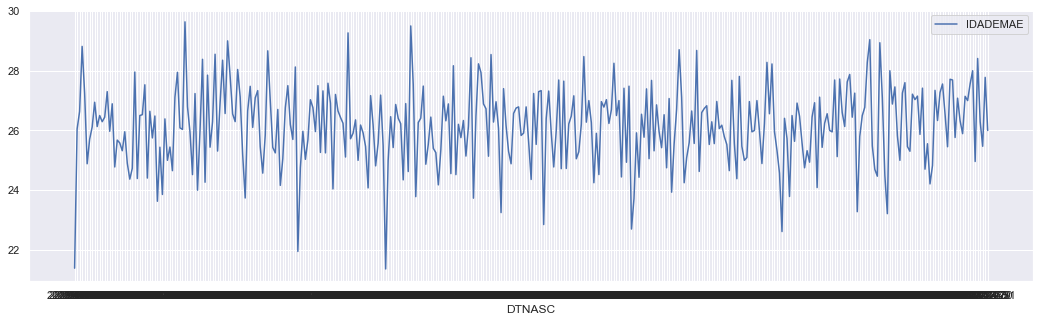

In [96]:
sns.set(rc={'figure.figsize':(18,5)})
sns.lineplot(data=sinasc_plot.get_group('Porto Velho').groupby('DTNASC').mean())

### Usando Matplotlib

<AxesSubplot:title={'center':'Porto Velho'}, xlabel='DTNASC'>

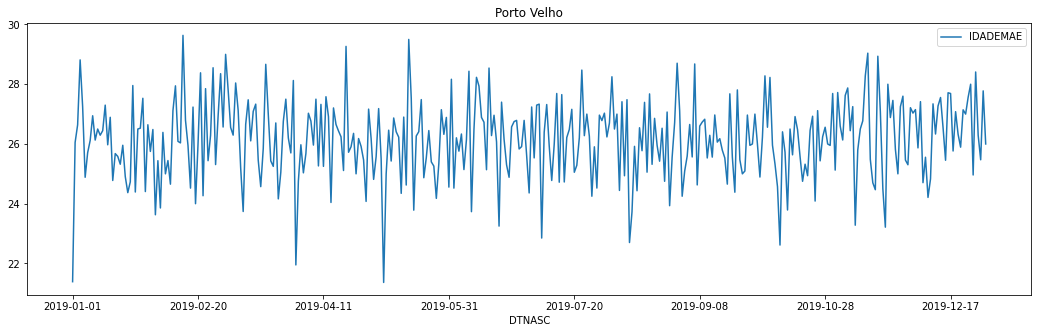

In [79]:
sinasc_plot=sinasc_1.groupby(imediatas)
sinasc_plot.get_group('Porto Velho').groupby('DTNASC').mean().plot(figsize=[18,5], title='Porto Velho')

<AxesSubplot:title={'center':'Ariquemes'}, xlabel='DTNASC'>

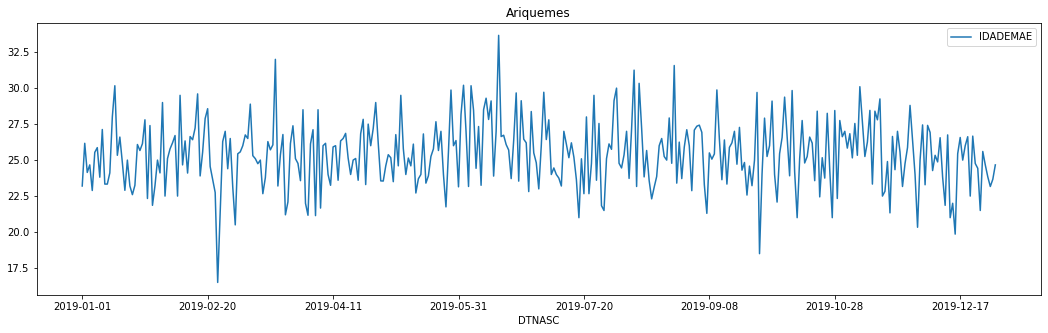

In [80]:
sinasc_plot.get_group('Ariquemes').groupby('DTNASC').mean().plot(figsize=[18,5], title='Ariquemes')

<AxesSubplot:title={'center':'Jaru'}, xlabel='DTNASC'>

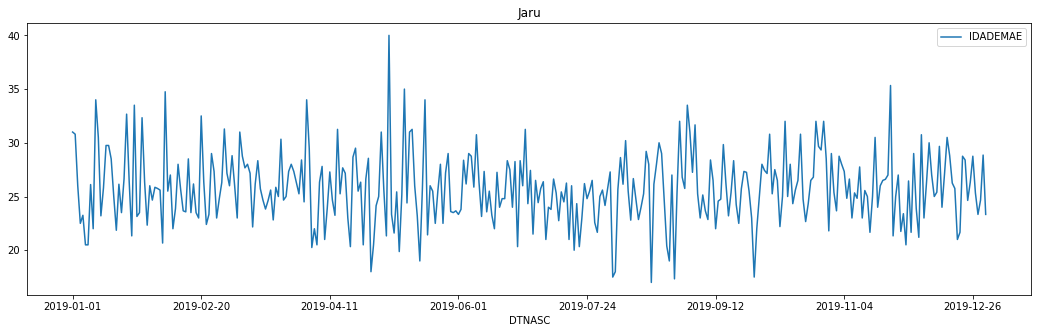

In [81]:
sinasc_plot.get_group('Jaru').groupby('DTNASC').mean().plot(figsize=[18,5], title='Jaru')

<AxesSubplot:title={'center':'Ji-Paraná'}, xlabel='DTNASC'>

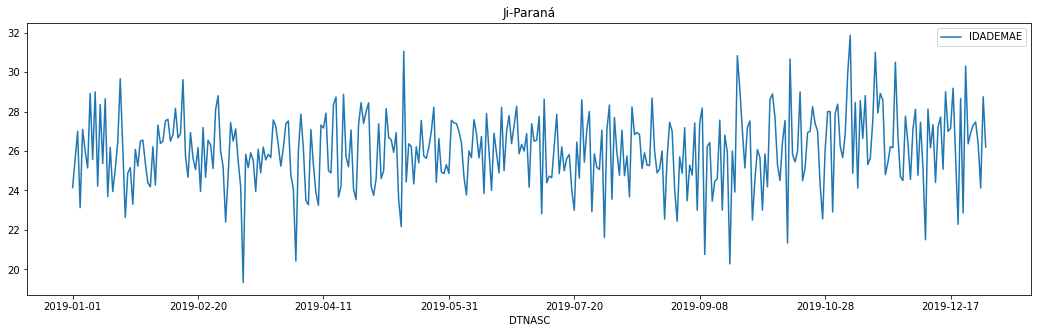

In [82]:
sinasc_plot.get_group('Ji-Paraná').groupby('DTNASC').mean().plot(figsize=[18,5], title='Ji-Paraná')

<AxesSubplot:title={'center':'Cacoal'}, xlabel='DTNASC'>

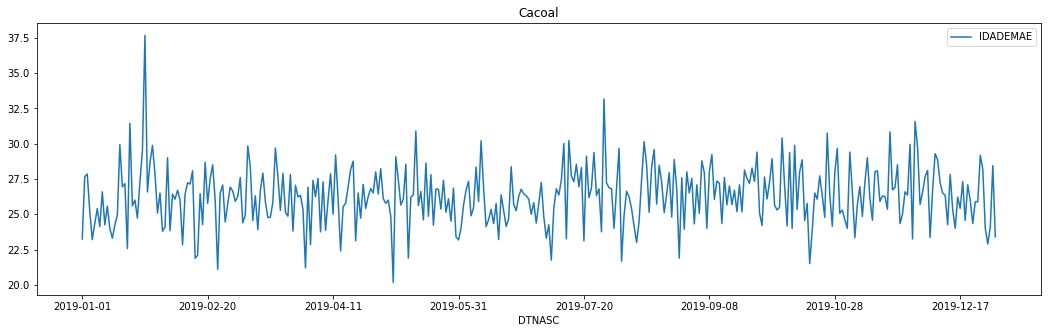

In [83]:
sinasc_plot.get_group('Cacoal').groupby('DTNASC').mean().plot(figsize=[18,5], title='Cacoal')

<AxesSubplot:title={'center':'Vilhena'}, xlabel='DTNASC'>

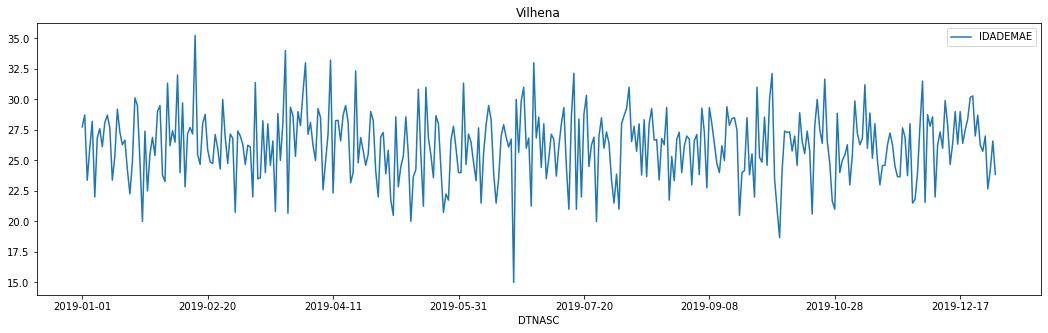

In [84]:
sinasc_plot.get_group('Vilhena').groupby('DTNASC').mean().plot(figsize=[18,5], title='Vilhena')

### 5. Utilize a tabela do link abaixo e crie faixas, utilizando o mapping e gere agrupamentos utilizando essas faixas como chave.


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [10]:
IDH = {
    "Porto Velho": "Alto",  
    "Cacoal": "Alto",
    "Pimenta Bueno": "Alto",
    "Rolim de Moura": "Alto",
    "Vilhena": "Alto",
    "Ji-Paraná": "Alto",
    "Ariquemes": "Alto",
    
    "Alta Floresta D'Oeste": "Médio",
    "Cabixi": "Médio",
    "Cerejeiras": "Médio",
    "Chupinguaia": "Médio",
    "Colorado do Oeste": "Médio",
    "Corumbiara": "Médio",
    "Pimenteiras do Oeste": "Médio",
    "Santa Luzia D'Oeste": "Médio",
    "São Felipe D'Oeste": "Médio",
    "Castanheiras": "Médio",
    "Espigão D'Oeste": "Médio",
    "Ministro Andreazza": "Médio",
    "Nova Brasilândia D'Oeste": "Médio",
    "Novo Horizonte do Oeste": "Médio",
    "Parecis": "Médio",
    "Primavera de Rondônia": "Médio",
    "Teixeirópolis": "Médio",
    "Urupá": "Médio",
    "Vale do Paraíso": "Médio",
    "Ouro Preto do Oeste": "Médio",
    "Presidente Médici": "Médio",
    "São Francisco do Guaporé": "Médio",
    "São Miguel do Guaporé": "Médio",
    "Cujubim": "Médio",
    "Monte Negro": "Médio",
    "Rio Crespo": "Médio",
    "Jaru": "Médio",
    "Ariquemes": "Médio",
    "Alto Paraíso": "Médio",
    "Buritis": "Médio",
    "Cacaulândia": "Médio",
    "Alvorada D'Oeste": "Médio",
    "Costa Marques": "Médio",
    "Mirante da Serra": "Médio",
    "Candeias do Jamari": "Médio",
    "Guajará-Mirim": "Médio",
    "Itapuã do Oeste": "Médio",
    
    "Alto Alegre dos Parecis": "Baixo",
    "Nova União": "Baixo",
    "Seringueiras": "Baixo",
    "Campo Novo de Rondônia": "Baixo",
    "Governador Jorge Teixeira": "Baixo",
    "Machadinho D'Oeste": "Baixo",
    "Theobroma": "Baixo",
    "Vale do Anari": "Baixo",
    "Nova Mamoré": "Baixo"
}

In [17]:
sinasc_2 = sinasc.set_index('munResNome')

In [24]:
sinasc_2.pivot_table(values='IDADEMAE', index=['ESCMAE', IDH], aggfunc='count',
                     margins=True, margins_name='Total')

IDADEMAE
ESCMAE          munResNome          
1 a 3 anos      Alto             228
                Baixo             49
                Médio            239
12 anos ou mais Alto            3763
                Baixo            222
                Médio           1782
4 a 7 anos      Alto            2411
                Baixo            421
                Médio           1928
8 a 11 anos     Alto            8485
                Baixo           1112
                Médio           6035
Nenhuma         Alto              19
                Baixo              3
                Médio             18
Total                          26716

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [11]:
IFDM = { 
    "Guajará-Mirim":               "Regular",
    "Itapuã do Oeste":             "Regular",
    "Nova Mamoré":                 "Regular",
    "Ariquemes":                   "Regular",
    "Alto Paraíso":                "Regular",
    "Cacaulândia":                 "Regular",
    "Campo Novo de Rondônia":      "Regular",
    "Cujubim":                     "Regular",
    "Governador Jorge Teixeira":   "Regular",
    "Machadinho D'Oeste":          "Regular",
    "Theobroma":                   "Regular",
    "Vale do Anari":               "Regular",
    "Alvorada D'Oeste":            "Regular",
    "Costa Marques":               "Regular",
    "Mirante da Serra":            "Regular",
    "Nova União":                  "Regular",
    "Seringueiras":                "Regular",
    "Vale do Paraíso":             "Regular",
    "Alto Alegre dos Parecis":     "Regular",
    "Castanheiras":                "Regular",
    "Espigão D'Oeste":             "Regular",
    "Ministro Andreazza":          "Regular",
    "Nova Brasilândia D'Oeste":    "Regular",
    "Novo Horizonte do Oeste":     "Regular",
    "Parecis":                     "Regular",
    "Cabixi":                      "Regular",
    "Corumbiara":                  "Regular",
    
    "Pimenta Bueno":               "Moderado",
    "Primavera de Rondônia":       "Moderado",
    "Rolim de Moura":              "Moderado",
    "Santa Luzia D'Oeste":         "Moderado",
    "São Felipe D'Oeste":          "Moderado",
    "Vilhena":                     "Moderado",
    "Cerejeiras":                  "Moderado",
    "Chupinguaia":                 "Moderado",
    "Colorado do Oeste":           "Moderado",
    "Pimenteiras do Oeste":        "Moderado",
    "Cacoal":                      "Moderado",
    "Alta Floresta D'Oeste":       "Moderado",
    "Teixeirópolis":               "Moderado",
    "Urupá":                       "Moderado",
    "Ouro Preto do Oeste":         "Moderado",
    "Presidente Médici":           "Moderado",
    "São Francisco do Guaporé":    "Moderado",
    "São Miguel do Guaporé":       "Moderado",
    "Ji-Paraná":                   "Moderado",
    "Monte Negro":                 "Moderado",
    "Rio Crespo":                  "Moderado",
    "Jaru":                        "Moderado",
    "Ariquemes":                   "Moderado",
    "Buritis":                     "Moderado",
    "Porto Velho":                 "Moderado",
    "Candeias do Jamari":          "Moderado"
}

In [26]:
sinasc_3 = sinasc.set_index('munResNome')

In [27]:
sinasc_3.pivot_table(values='IDADEMAE', index=['LOCNASC', IFDM], aggfunc='count',
                     margins=True, margins_name='Total')

IDADEMAE
LOCNASC munResNome          
1       Moderado       21843
        Regular         5034
2       Moderado          27
        Regular            8
3       Moderado          47
        Regular           25
4       Moderado          29
        Regular           14
Total                  27028

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [12]:
PIB = { 
    "Pimenta Bueno":               "Acima de 1 Bilhão",
    "Rolim de Moura":              "Acima de 1 Bilhão",
    "Vilhena":                     "Acima de 1 Bilhão",
    "Cacoal":                      "Acima de 1 Bilhão",
    "Jaru":                        "Acima de 1 Bilhão",
    "Ariquemes":                   "Acima de 1 Bilhão",
    "Ji-Paraná":                   "Acima de 1 Bilhão",
    "Porto Velho":                 "Acima de 1 Bilhão",
    
    "Guajará-Mirim":               "Acima de 500 Milhões",
    "Buritis":                     "Acima de 500 Milhões",
    "Candeias do Jamari":          "Acima de 500 Milhões",
    "Nova Mamoré":                 "Acima de 500 Milhões",
    "Machadinho D'Oeste":          "Acima de 500 Milhões",
    "Espigão D'Oeste":             "Acima de 500 Milhões",
    "Cerejeiras":                  "Acima de 500 Milhões",
    "Ouro Preto do Oeste":         "Acima de 500 Milhões",
    "São Miguel do Guaporé":       "Acima de 500 Milhões",
    "Presidente Médici":           "Acima de 300 Milhões",
    "São Francisco do Guaporé":    "Acima de 300 Milhões",
    "Alto Paraíso":                "Acima de 300 Milhões",
    "Cujubim":                     "Acima de 300 Milhões",
    "Alta Floresta D'Oeste":       "Acima de 300 Milhões",
    "Colorado do Oeste":           "Acima de 300 Milhões",
    "Nova Brasilândia D'Oeste":    "Acima de 300 Milhões",
    
    "Campo Novo de Rondônia":      "Acima de 200 Milhões",
    "Alvorada D'Oeste":            "Acima de 200 Milhões",
    "Alto Alegre dos Parecis":     "Acima de 200 Milhões",
    "Monte Negro":                 "Acima de 200 Milhões",
    
    "Itapuã do Oeste":             "Acima de 100 Milhões",
    "Cacaulândia":                 "Acima de 100 Milhões",
    "Governador Jorge Teixeira":   "Acima de 100 Milhões",
    "Theobroma":                   "Acima de 100 Milhões",
    "Vale do Anari":               "Acima de 100 Milhões",
    "Costa Marques":               "Acima de 100 Milhões",
    "Mirante da Serra":            "Acima de 100 Milhões",
    "Cabixi":                      "Acima de 100 Milhões",
    "Corumbiara":                  "Acima de 100 Milhões",
    "Seringueiras":                "Acima de 100 Milhões",
    "Vale do Paraíso":             "Acima de 100 Milhões",
    "Ministro Andreazza":          "Acima de 100 Milhões",
    "Novo Horizonte do Oeste":     "Acima de 100 Milhões",
    "Santa Luzia D'Oeste":         "Acima de 100 Milhões",
    "Chupinguaia":                 "Acima de 100 Milhões",
    "Urupá":                       "Acima de 100 Milhões",
    
    "Ariquemes":                   "Até 100 Milhões",
    "Nova União":                  "Até 100 Milhões",
    "Castanheiras":                "Até 100 Milhões",
    "Parecis":                     "Até 100 Milhões",
    "Primavera de Rondônia":       "Até 100 Milhões",
    "São Felipe D'Oeste":          "Até 100 Milhões",
    "Pimenteiras do Oeste":        "Até 100 Milhões",
    "Teixeirópolis":               "Até 100 Milhões",
    "Rio Crespo":                  "Até 100 Milhões"
}

In [29]:
sinasc_4 = sinasc.set_index('munResNome')

In [34]:
sinasc_4.pivot_table(values='IDADEMAE', index=[PIB], aggfunc='count',
                     margins=True, margins_name='Total')

,IDADEMAE
munResNome,
Acima de 1 Bilhão,16007
Acima de 100 Milhões,1952
Acima de 200 Milhões,724
Acima de 300 Milhões,1880
Acima de 500 Milhões,4304
Até 100 Milhões,2160
Total,27028


In [38]:
sinasc_4.pivot_table(values=['QTDFILVIVO', 'QTDFILMORT'], index=[PIB], aggfunc='mean',
                     margins=True, margins_name='Total')

,QTDFILMORT,QTDFILVIVO
munResNome,,
Acima de 1 Bilhão,0.273382,1.033879
Acima de 100 Milhões,0.237474,1.001561
Acima de 200 Milhões,0.238829,1.000000
Acima de 300 Milhões,0.233261,0.996774
Acima de 500 Milhões,0.297597,1.234191
Até 100 Milhões,0.227464,0.969725
Total,0.263283,1.040291


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

- Os municípios com PIB acima de 500 milhões e acima de 1 bilhão apresentam números acima dos demais municípios nos quesitos quantidade de nascimentos e média de filhos vivos, apesar de apresentar, também, uma média de filhos mortos maior. 
- Quanto maior o IDH, maior o número de mães que possuem 4 anos ou mais de escolaridade.